In [65]:
from functions import grids, ellip
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
import random

In [166]:
def saltandpepper(image, prob):
    """
    Add salt and pepper noise to image
    prob: Probability of the noise
    """
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0]) #, dtype='uint8')
            white = np.array([1, 1, 1]) #, dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    
    return output


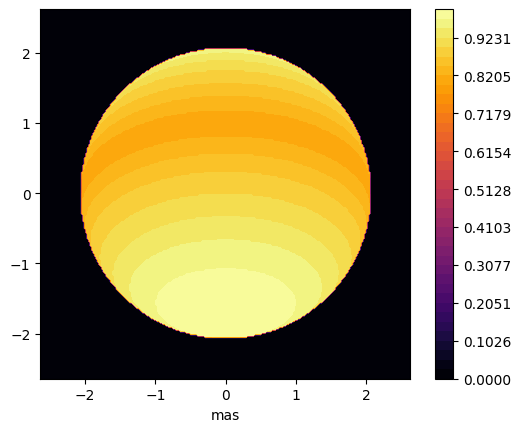

In [92]:
sx,sy,x,y = grids(1e-10,512,1e-6) # Grids parameter?

# Ellipse inputs: (sx,sy,rad,inc,pa,sq)
# Notes on parameter space
# Rad: between 3e-9 and 1.5e-8
# Inclination: between 0 and 2pi? (artifacts for e.g. 1.57!!!)
# pa: Rotation around (x/y axis (not z axis!!); between 0 and 2pi
# sq: "thickness" in z-direction of the ellipsoid (pole-pole distance). Best between 0.5 and 1.2
epsilon = 0.05

ellipse = ellip(sx,sy,1e-8,np.pi/3,0,1)


In [172]:
ellipse = mpimg.imread("Data/Tests/ellipsoid_1560.jpg")

In [173]:
ellipse = cv2.cvtColor(ellipse, cv2.COLOR_BGR2GRAY)
ellipse.max()

196

In [174]:
noise = saltandpepper(ellipse, 0.01)
noise.max()
ellipse_sap = cv2.add(noise, ellipse)

255

In [180]:
ellipse_sap = cv2.resize(ellipse_sap, dsize=(64, 64), interpolation=cv2.INTER_AREA)
ellipse_sap = ellipse_sap - np.mean(ellipse_sap)
ellipse_sap.max()

245.61138653755188

-20.312744140625

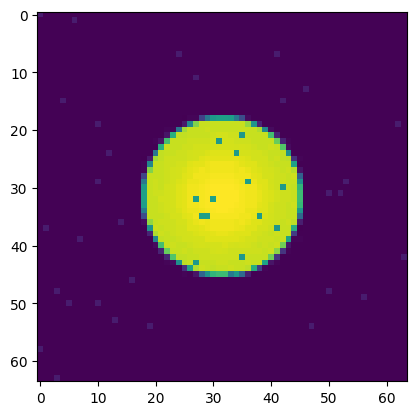

In [181]:
plt.imshow(ellipse_sap)